In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('infy_stock_data.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.2+ KB

In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

0

In [9]:
df['Close'] = pd.qcut(df['Close'], q=2, labels=False)

In [10]:
X = df.drop(columns=['Date', 'Close'])
Y = df[['Close']]

In [11]:
X

,Symbol,Series,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.00,1094.45,2576985,2.820380e+14,65379,1754378,0.6808


In [12]:
Y

,Close
0,1
1,1
2,1
3,1
4,1
...,...
243,0
244,0
245,0
246,0


In [13]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Symbol', 'Series']

In [15]:
con

['Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'VWAP',
 'Volume',
 'Turnover',
 'Trades',
 'Deliverable Volume',
 '%Deliverble']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Prev Close,num__Open,num__High,num__Low,num__Last,num__VWAP,num__Volume,num__Turnover,num__Trades,num__Deliverable Volume,num__%Deliverble,cat__Symbol_INFY,cat__Series_EQ
0,0.796995,0.790250,0.779060,0.815875,0.800332,0.801840,-1.216659,-1.201353,-1.541785,-1.513070,-1.718396,1.0,1.0
1,0.800497,0.796010,0.848489,0.844739,0.889181,0.862299,-0.631277,-0.310582,-0.763468,-0.621579,0.874897,1.0,1.0
2,0.873936,0.867586,0.869009,0.855252,0.847642,0.864838,-0.244087,0.275921,-0.197881,-0.098159,0.873728,1.0,1.0
3,0.841191,0.811118,0.784681,0.772291,0.789167,0.770540,-0.277147,0.181409,0.307972,-0.151137,0.829278,1.0,1.0
4,0.762263,0.782790,0.765474,0.802685,0.790964,0.785261,-0.573469,-0.250463,-0.598974,-0.559854,0.756754,1.0,1.0


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [22]:
xtrain.head()

,num__Prev Close,num__Open,num__High,num__Low,num__Last,num__VWAP,num__Volume,num__Turnover,num__Trades,num__Deliverable Volume,num__%Deliverble,cat__Symbol_INFY,cat__Series_EQ
124,-1.048732,-1.041547,-1.058526,-1.041861,-1.058968,-1.058393,-0.479670,-0.832949,-0.280157,-0.543212,0.052577,1.0,1.0
115,-1.040120,-1.020206,-1.041661,-1.026473,-1.042883,-1.040621,0.173159,-0.333933,0.088303,0.593187,1.369693,1.0,1.0
84,0.701411,0.701582,0.751138,0.726223,0.741667,0.747917,-0.631073,-0.348133,-0.473854,-0.917013,-1.393211,1.0,1.0
5,0.779960,0.821694,0.807169,0.802685,0.815944,0.804568,0.200617,0.908674,0.001526,0.671014,1.517079,1.0,1.0
56,1.290817,1.292509,1.287647,1.292040,1.262460,1.281061,-0.636399,-0.180610,-0.965769,-0.647817,0.726341,1.0,1.0


In [23]:

ytrain.head()

,Close
124,0
115,0
84,1
5,1
56,1


In [24]:
xtest.head()

,num__Prev Close,num__Open,num__High,num__Low,num__Last,num__VWAP,num__Volume,num__Turnover,num__Trades,num__Deliverable Volume,num__%Deliverble,cat__Symbol_INFY,cat__Series_EQ
33,1.410155,1.404122,1.438687,1.456529,1.466841,1.466550,-0.276374,0.511236,-0.608669,-0.170108,0.721663,1.0,1.0
6,0.798699,0.811307,1.017050,0.732053,0.997711,0.927552,4.037141,6.889064,5.284318,1.285846,-4.233317,1.0,1.0
182,-0.840433,-0.836734,-0.824377,-0.827003,-0.815792,-0.823244,-0.295633,-0.586289,-0.700620,-0.638172,-1.696171,1.0,1.0
86,0.769361,0.782790,0.812791,0.806890,0.847548,0.820029,-0.875553,-0.689702,-0.763190,-1.042741,-0.112355,1.0,1.0
156,-0.761316,-0.756376,-0.773594,-0.779119,-0.770185,-0.780159,-0.700344,-0.913303,-0.826890,-1.135071,-2.640144,1.0,1.0


In [25]:
ytest.head()

,Close
33,1
6,1
182,0
86,1
156,0


In [26]:

xtrain.shape

(173, 13)

In [27]:
xtest.shape

(75, 13)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'KNN': KNeighborsClassifier(),
       'SVM': SVC()}

In [30]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [31]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [32]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.9467
Train F1 Cross Validated : 0.9414
Test F1 : 0.9254


Model name : Decision Tree

Train F1 : 1.0000
Train F1 Cross Validated : 0.9884
Test F1 : 0.9859


Model name : Random Forest

Train F1 : 1.0000
Train F1 Cross Validated : 0.9884
Test F1 : 0.9714


Model name : Gradient Boost

Train F1 : 1.0000
Train F1 Cross Validated : 0.9884
Test F1 : 0.9859


Model name : KNN

Train F1 : 0.9529
Train F1 Cross Validated : 0.9414
Test F1 : 0.9394


Model name : SVM

Train F1 : 0.9467
Train F1 Cross Validated : 0.9357
Test F1 : 0.9394




In [33]:

tr

[0.9467455621301775, 1.0, 1.0, 1.0, 0.9529411764705882, 0.9467455621301775]

In [34]:
ts

[0.9253731343283582,
 0.9859154929577465,
 0.9714285714285714,
 0.9859154929577465,
 0.9393939393939394,
 0.9393939393939394]

In [35]:
tr_cv

[0.9413903215112892,
 0.9883795483795484,
 0.9883795483795484,
 0.9883795483795484,
 0.9413997044618487,
 0.9356666987288431]

In [36]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVM': SVC()}

In [37]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

In [38]:
results_dct = {'Model_name' : list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [39]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.946746,0.925373,0.941390
1,Decision Tree,1.000000,0.985915,0.988380
2,Random Forest,1.000000,0.971429,0.988380
3,Gradient Boost,1.000000,0.985915,0.988380
4,KNN,0.952941,0.939394,0.941400
5,SVM,0.946746,0.939394,0.935667


In [40]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
1,Decision Tree,1.000000,0.985915,0.988380
3,Gradient Boost,1.000000,0.985915,0.988380
2,Random Forest,1.000000,0.971429,0.988380
4,KNN,0.952941,0.939394,0.941400
5,SVM,0.946746,0.939394,0.935667
0,Logistic,0.946746,0.925373,0.941390


we can choose Decision Tree or Gradient Boosting

applying decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model = DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

In [43]:
model.score(xtrain, ytrain)

1.0

In [44]:
model.score(xtest, ytest)

0.9866666666666667

In [45]:
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8,
           9],
          'criterion':['gini', 'entropy']}

In [46]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [47]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}

In [48]:
gscv.best_score_

0.9941125541125541

In [49]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=1, min_samples_split=5)

In [50]:
best_dtc.score(xtrain, ytrain)

1.0

In [51]:
best_dtc.score(xtest, ytest)

0.9866666666666667

In [52]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [53]:
ypred_tr[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [55]:
ytrain.head()

,Close
124,0
115,0
84,1
5,1
56,1


In [56]:
ypred_ts[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [57]:
ytest.head()

,Close
33,1
6,1
182,0
86,1
156,0


In [58]:
best_dtc.classes_

array([0, 1], dtype=int64)

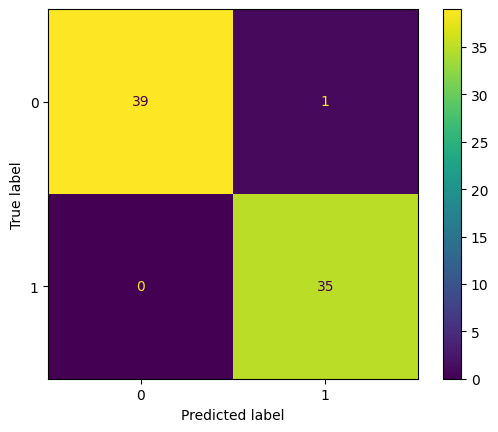

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      1.00      0.99        35

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



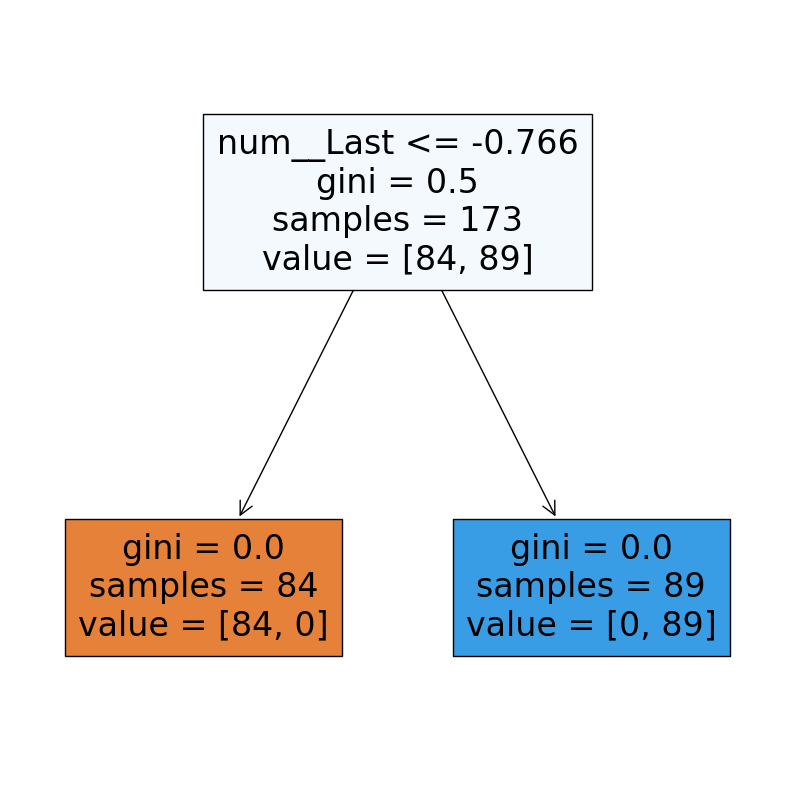

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc, feature_names=list(xtrain.columns), filled=True)
plt.show()